In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import os

In [2]:
from os import listdir
from os.path import isfile, join

dataset = "data/"
files = [f for f in listdir(dataset) if isfile(join(dataset, f))]
q = 6
for i in files[q:q+1]:
    filein = dataset + i#files[4]

    #plt.figure(1)

    #plt.subplot(231)

    # white color mask
    img = cv2.imread(filein)
    #plt.imshow(img,cmap='gray')
    #plt.show()

    #converted = convert_hls(img)
    image = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    lower = np.uint8([0, 200, 0])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower, upper)
    # yellow color mask
    lower = np.uint8([10, 0,   100])
    upper = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    result = img.copy()
    #cv2.imshow("mask",mask)
    #cv2.waitKey(0)
    #plt.subplot(232)
    #plt.imshow(mask,cmap='gray')
    #plt.show()

    height,width = mask.shape
    skel = np.zeros([height,width],dtype=np.uint8)      #[height,width,3]
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    temp_nonzero = np.count_nonzero(mask)
    #while(np.count_nonzero(mask) != 0 ):
    for _ in range(8):
        eroded = cv2.erode(mask,kernel)
        #cv2.imshow("eroded",eroded)   
        temp = cv2.dilate(eroded,kernel)
        #cv2.imshow("dilate",temp)
        temp = cv2.subtract(mask,temp)
        skel = cv2.bitwise_or(skel,temp)
        mask = eroded.copy()
        #plt.imshow(mask,cmap='gray')
        #plt.show()

    #cv2.imshow("skel",skel)
    #cv2.waitKey(0)
    #plt.subplot(233)
    #plt.imshow(mask,cmap='gray')
    minLineLength = 200
    maxLineGap = 60
    imgg = img.copy()
    lines = cv2.HoughLinesP(mask,1,np.pi/180,30,minLineLength,maxLineGap)
    try:
        print(len(lines))
        k = []
        b = []
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(imgg,(x1,y1),(x2,y2),(255,0,0),2)
                k.append(-(y2-y1)/(x2-x1))
                b.append(y1 - x1*(y2-y1)/(x2-x1))
                #print(x1,y1,x2,y2)
    except:
        pass
    #plt.subplot(234)
    #plt.imshow(imgg)
    import numpy as np
    from sklearn.cluster import KMeans, MeanShift
    print(np.array(sorted(k)))
    print(np.array(k).mean(),np.array(k).std())
    print(np.array(sorted(b)))
    print(np.array(b).mean(),np.array(b).std())
    #plt.subplot(235)
    #plt.plot(np.array(k),np.array(b),'ro')
    X = np.array([(k_,b_) for k_, b_ in zip(k, b) if k_!=np.inf and k_!=np.nan and b_!=np.nan and b_!=np.inf])
    #todrop = np.array(k)!=np.inf and np.array(k)!=np.nan and np.array(b)!=np.nan and np.array(b)!=np.inf
    print(X)
    #X = X[todrop]
    #print(X)
    print('!')
    #clusters = KMeans(n_clusters=3, random_state=0).fit_predict(X)
    clusters = MeanShift(bandwidth=40, bin_seeding=True).fit_predict(X)
#     a = []
    for n_cluster in set(clusters):
        avg_cluster = np.mean(X[clusters==n_cluster],axis=0)
        print(avg_cluster)
        k, b = avg_cluster[0], avg_cluster[1]
#         a.extend([avg_cluster])
        height, width, channels = img.shape
        cv2.line(imgg,(0,int(b)),(width,int(width*k+b)),(255,0,0),2)
        #plt.subplot(236)
        plt.plot((0,width),(int(b),int(width*(-k)+b)))
#     distance = (a)
#     d = np.log(distance**0.5)    
#     print(d)
    plt.title("{} clusters found".format(len(set(clusters))))
    plt.imshow(img)
        
    plt.show()
    
    

SyntaxError: invalid syntax (<ipython-input-2-1ae1fea6f920>, line 101)

In [18]:
distance = np.log(np.sqrt((avg_cluster[0]-avg_cluster[0])**2+(avg_cluster[1]+avg_cluster[1])**2))
  
print(distance)

6.850209951293019


In [32]:
print(a)

[array([ -0.22312218, -31.7726232 ]), array([-2.79886897e-01,  4.72039548e+02])]


In [3]:

filein = 'data/02-big.jpg'
# white color mask
img = cv2.imread(filein)
plt.imshow(img,cmap='gray')
plt.show()

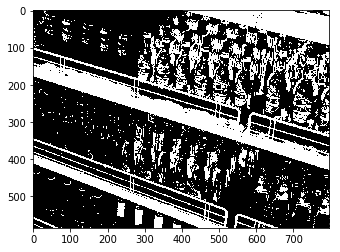

In [4]:

#converted = convert_hls(img)
image = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
lower = np.uint8([0, 200, 0])
upper = np.uint8([255, 255, 255])
white_mask = cv2.inRange(image, lower, upper)
# yellow color mask
lower = np.uint8([10, 0,   100])
upper = np.uint8([40, 255, 255])
yellow_mask = cv2.inRange(image, lower, upper)
# combine the mask
mask = cv2.bitwise_or(white_mask, yellow_mask)
result = img.copy()
#cv2.imshow("mask",mask)
#cv2.waitKey(0)
plt.imshow(mask,cmap='gray')
plt.show()


In [1]:
edges = cv2.Canny(skel, 50, 150)
plt.imshow(edges,cmap='gray')
plt.show()
lines = cv2.HoughLinesP(edges,1,np.pi/180,40,minLineLength=30,maxLineGap=30)
i = 0
for x1,y1,x2,y2 in lines[0]:
    i+=1
    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),1)
print(i)


NameError: name 'cv2' is not defined

In [4]:
import cv2
import numpy as np

img = cv2.imread('data/01.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(gray,100,200,apertureSize = 3)
#cv2.imshow('edges',edges)
plt.imshow(edges,cmap='gray')
#cv2.waitKey(0)

minLineLength = 30
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength,maxLineGap)
print(len(lines))
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
plt.imshow(img,cmap='gray')


277


In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np

def plot_func(min1, max1, min2, max2):
    image = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    lower = np.uint8([min1, min1, min1])
    upper = np.uint8([max1, max1, max1])
    white_mask = cv2.inRange(image, lower, upper)
    # yellow color mask
    lower = np.uint8([min2, min2, min2])
    upper = np.uint8([max2, max2, max2])
    yellow_mask = cv2.inRange(image, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    result = img.copy()
    #cv2.imshow("mask",mask)
    #cv2.waitKey(0)
    plt.imshow(mask,cmap='gray')

interact(plot_func, 
         min1 = widgets.FloatSlider(value=0, min=0, max=255, step=1), 
         max1 = widgets.FloatSlider(value=255, min=0, max=255, step=1),
         min2 = widgets.FloatSlider(value=0, min=0, max=255, step=1), 
         max2 = widgets.FloatSlider(value=255, min=0, max=255, step=1))


A Jupyter Widget

<function __main__.plot_func>

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(freq, amp):
    x = np.linspace(0, 2*np.pi)
    y = amp*np.sin(x * freq)
    plt.plot(x, y)

interact(plot_func, freq = widgets.FloatSlider(value=7.5, min=1, max=5.0, step=0.5), amp=widgets.FloatSlider(value=1, min=0.5, max=3, step=0.2))


A Jupyter Widget

<function __main__.plot_func>